In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

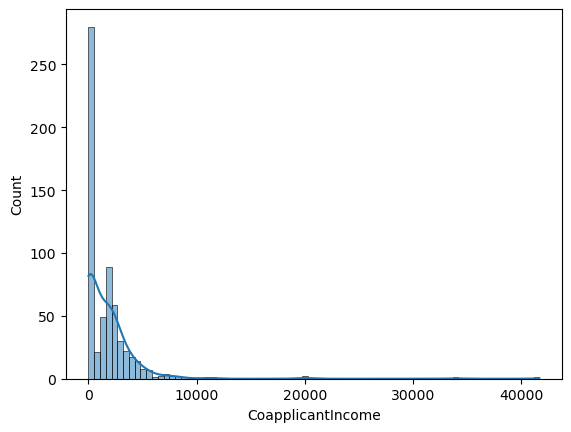

In [4]:
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.show()

In [5]:
quant = df['CoapplicantIncome'].quantile
q1 = quant(0.25)
q3 = quant(0.75)
iqr = q3 - q1
max_range = q3 + 1.5*iqr
min_range = q1 - 1.5*iqr

In [6]:
max_range, min_range

(np.float64(5743.125), np.float64(-3445.875))

In [7]:
df = df[df['CoapplicantIncome'] <= max_range]

In [8]:
df.shape

(596, 13)

In [9]:
from sklearn.preprocessing import FunctionTransformer

In [10]:
ft = FunctionTransformer(func=np.log1p)
ft.fit(df['CoapplicantIncome'])
df['CoapplicantIncome_tf'] = ft.transform(df['CoapplicantIncome'])

In [11]:
ft1 = FunctionTransformer(func=lambda x: x**2)
ft1.fit(df['CoapplicantIncome'])
df['CoapplicantIncome_tf1'] = ft1.transform(df['CoapplicantIncome'])

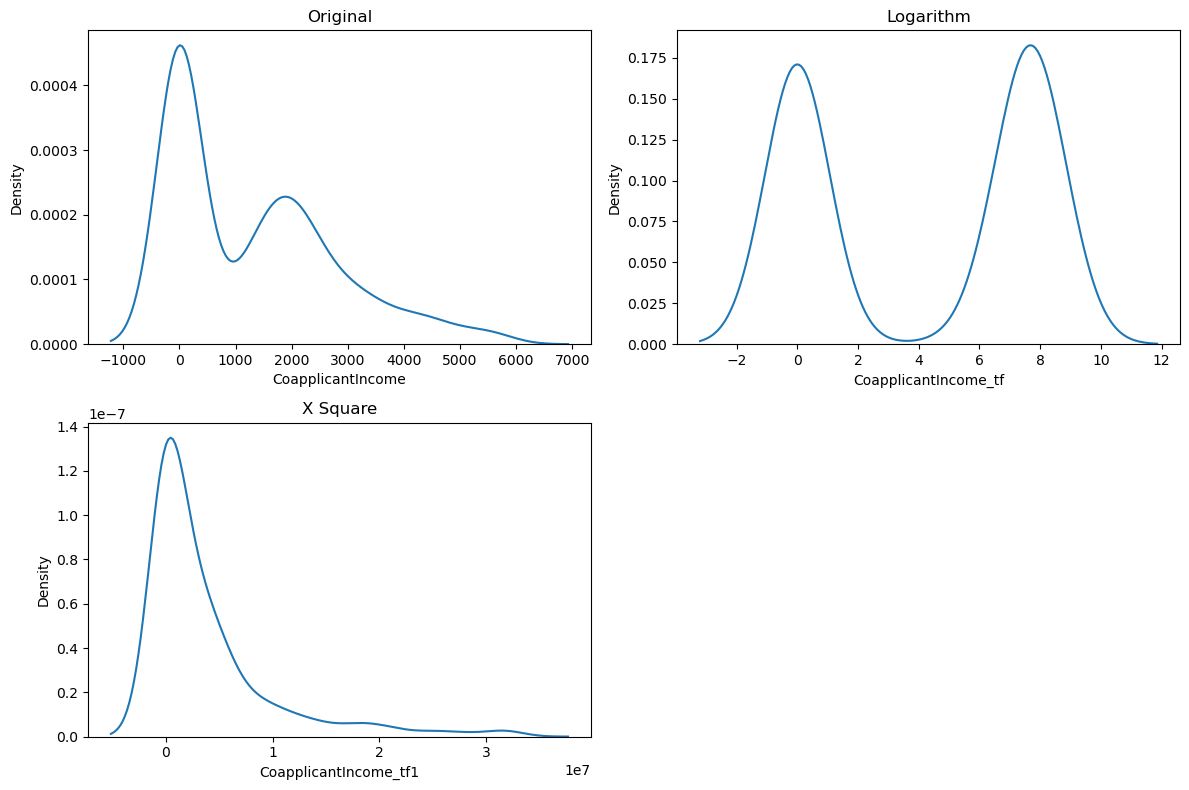

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original')
sns.kdeplot(df['CoapplicantIncome'])

plt.subplot(2, 2, 2)
plt.title('Logarithm')
sns.kdeplot(df['CoapplicantIncome_tf'])

plt.subplot(2, 2, 3)
plt.title('X Square')
sns.kdeplot(df['CoapplicantIncome_tf1'])

plt.tight_layout()
plt.show()